# Cleaning and Preprocessing Black Friday Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train.shape

(550068, 12)

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df=pd.concat([df_train,df_test],ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df=df.drop(['User_ID'],axis=1)

In [8]:
df['Gender']=df.Gender.map({'F':0,'M':1})

In [9]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df.Age=df.Age.map({'0-17':0, '55+':1, '26-35':2, '46-50':3, '51-55':3, '36-45':4, '18-25':5})

In [12]:
df.City_Category=df.City_Category.map({'A':1,'B':2,'C':3})

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,1,16,3,4+,0,8,NaN,NaN,7969.0


In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,1,16,3,4+,0,8,NaN,NaN,7969.0


In [15]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [16]:
#Focus on Repalcing Null Values
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [17]:
df.Product_Category_2.value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [18]:
df_train.Product_Category_1.value_counts()

Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [19]:
# replace the categorial values with mode
df['Product_Category_2']=df.Product_Category_2.fillna(df.Product_Category_2.mode()[0])

In [20]:
df.Product_Category_2.isnull().sum()

0

In [21]:
df.Product_Category_3.value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [22]:
df['Product_Category_3']=df.Product_Category_3.fillna(df.Product_Category_3.mode()[0])

In [23]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,1,16,3,4+,0,8,8.0,16.0,7969.0


In [24]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [25]:
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.map({'2':2, '4+':4, '3':3, '1':1, '0':0})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 65.8+ MB


In [27]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [29]:
sns.pairplot(df[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']],height=1.5)
plt.plot()

[]

Error in callback <function flush_figures at 0x13795e5e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

<Axes: xlabel='Age', ylabel='Purchase'>

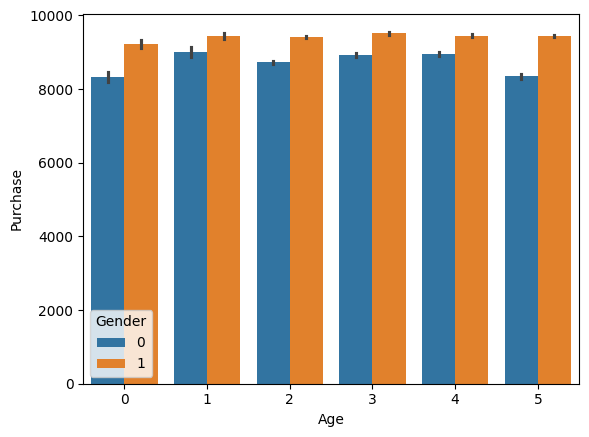

In [39]:
sns.barplot(x=df.Age,y=df.Purchase,hue=df.Gender)

<Axes: xlabel='Occupation', ylabel='Purchase'>

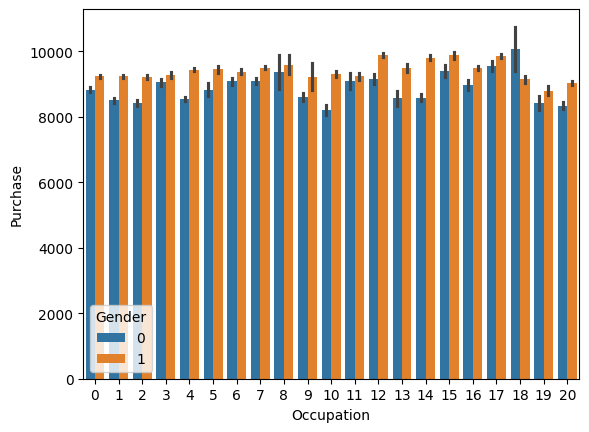

In [40]:
#
sns.barplot(x=df.Occupation,y=df.Purchase,hue=df.Gender)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

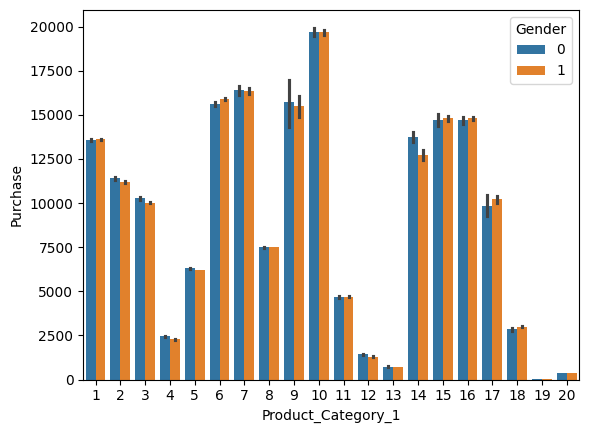

In [42]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

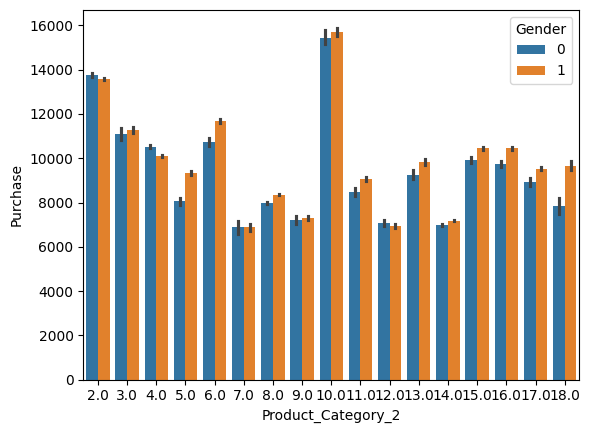

In [43]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

In [62]:
product=df.Product_Category_1.value_counts()
product

Product_Category_1
5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x293f25280>,
 [Text(0.5493665893820301, 0.9529933632878856, '5'),
  Text(-1.0971493419609621, 0.07914114880785927, '1'),
  Text(0.1301102052610962, -1.0922780481575722, '8'),
  Text(0.9665948292520246, -0.5250661254196939, '11'),
  Text(1.085014767813603, -0.18095014127210046, '2')],
 [Text(0.2996545032992891, 0.5198145617933921, '33.35%'),
  Text(-0.5984450956150702, 0.04316789934974142, '31.00%'),
  Text(0.07096920286968883, -0.5957880262677666, '25.07%'),
  Text(0.527233543228377, -0.2863997047743785, '5.32%'),
  Text(0.591826236989238, -0.09870007705750933, '5.26%')])

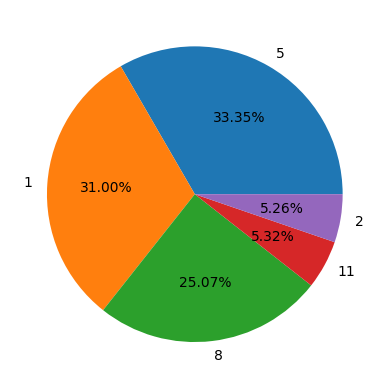

In [67]:
plt.pie(product.values[:5],labels=product.index[:5],autopct='%1.2f%%')

In [68]:
product=df.Product_ID.value_counts()
product

Product_ID
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00185942       1
P00104342       1
P00074742       1
P00081342       1
P00253842       1
Name: count, Length: 3677, dtype: int64

([<matplotlib.patches.Wedge at 0x16b8afcd0>,
 [Text(0.8204106314621747, 0.732752615678604, 'P00265242'),
  Text(-0.5359265731772573, 0.9606157963319581, 'P00025442'),
  Text(-1.0829036762983149, -0.1931828870774904, 'P00110742'),
  Text(-0.1797630086714175, -1.085212080983897, 'P00112142'),
  Text(0.9314978561075561, -0.5850741355307265, 'P00046742')],
 [Text(0.44749670807027714, 0.3996832449156021, '23.21%'),
  Text(-0.29232358536941305, 0.5239722525447044, '19.79%'),
  Text(-0.5906747325263535, -0.1053724838604493, '19.63%'),
  Text(-0.09805255018440953, -0.5919338623548528, '19.52%'),
  Text(0.5080897396950306, -0.3191313466531235, '17.85%')])

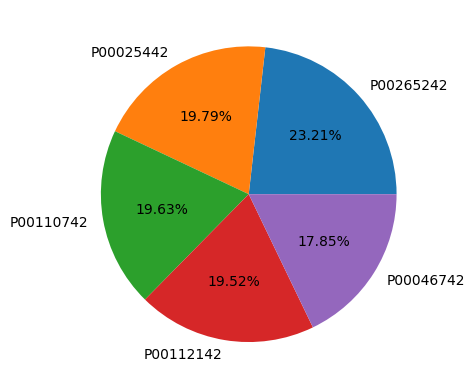

In [69]:
plt.pie(product.values[:5],labels=product.index[:5],autopct='%1.2f%%')

In [70]:
df_test=df[df['Purchase'].isnull()]

In [72]:
df_train=df[~df['Purchase'].isnull()]

In [73]:
df_train.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [74]:
## feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_train=sc.fit_transform(df_train[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']])
df_test=sc.fit_transform(df_test[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']])

/Users/arpitagrawal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/arpitagrawal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/arpitagrawal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
